# Insights

In [44]:
# Import libraries 
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20,5)
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [45]:
# Import the data source to create a data frame 
df = pd.read_csv('C:/Users/zebun/Desktop/kc_house_data.csv')

In [46]:
# Run data frame to make sure the df is refelcting the correct data retreived from database 
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
# Correlation test 
correlation=df.corr()
correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [33]:
#Retreive the correlation on price and sort in descending order 
correlation['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [34]:
#Drop insignificant values in the correlation test 
correlation['price'].drop(['id','zipcode','long','lat']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Name: price, dtype: float64

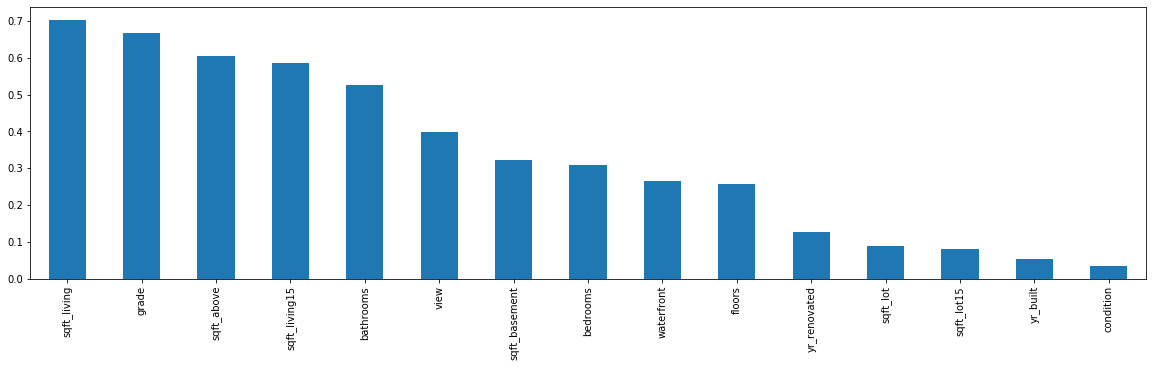

In [35]:
# Plot 
correlation['price'].drop(['price','id','zipcode','long','lat']).sort_values(ascending=False).plot(kind='bar')

In [36]:
# Create values for Regression test
y=df['price']
x=df[['sqft_living','grade','sqft_living15','bathrooms','view','sqft_basement','bedrooms','waterfront','floors']]
x=sm.add_constant(x)
x

,const,sqft_living,grade,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront,floors
0,1.0,1180,7,1340,1.00,0,0,3,0,1.0
1,1.0,2570,7,1690,2.25,0,400,3,0,2.0
2,1.0,770,6,2720,1.00,0,0,2,0,1.0
3,1.0,1960,7,1360,3.00,0,910,4,0,1.0
4,1.0,1680,8,1800,2.00,0,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,8,1530,2.50,0,0,3,0,3.0
21609,1.0,2310,8,1830,2.50,0,0,4,0,2.0
21610,1.0,1020,7,1020,0.75,0,0,2,0,2.0
21611,1.0,1600,8,1410,2.50,0,0,3,0,2.0


In [37]:
# Regression test
regression_model = sm.OLS(y, x).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3544.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:03:35   Log-Likelihood:            -2.9781e+05
No. Observations:               21613   AIC:                         5.956e+05
Df Residuals:                   21603   BIC:                         5.957e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.952e+05   1.44e+04    -34.457      0.000   -5.23e+05   -4.67e+05
sqft_living     179.8455      4.114     43.716      0.000     171.782     187.909
grade          1.004e+05   2392.682     41.950      0.000    9.57e+04    1.05e+05
sqft_living15     6.1645      3.863      1.596      0.111      -1.407      13.736
bathrooms     -1.768e+04   3523.403     -5.018      0.000   -2.46e+04   -1.08e+04
view           6.123e+04   2427.832     25.219      0.000    5.65e+04     6.6e+04
sqft_basement    45.1901      4.827      9.362      0.000      35.729      54.652
bedrooms      -2.934e+04   2171.351    -13.513      0.000   -3.36e+04   -2.51e+04
waterfront     5.879e+05   2.01e+04     29.266      0.000    5.49e+05    6.27e+05
floors        -1.018e+04   3974.509     -2.561      0.010    -1.8e+04   -2389.885
==============================================================================
Omnibus:                    15557.695   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901418.455
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      34.110   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
y=df['price']
x=df[['sqft_living','grade','bathrooms','view','sqft_basement','bedrooms','waterfront','floors']]
x=sm.add_constant(x)
x

,const,sqft_living,grade,bathrooms,view,sqft_basement,bedrooms,waterfront,floors
0,1.0,1180,7,1.00,0,0,3,0,1.0
1,1.0,2570,7,2.25,0,400,3,0,2.0
2,1.0,770,6,1.00,0,0,2,0,1.0
3,1.0,1960,7,3.00,0,910,4,0,1.0
4,1.0,1680,8,2.00,0,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,8,2.50,0,0,3,0,3.0
21609,1.0,2310,8,2.50,0,0,4,0,2.0
21610,1.0,1020,7,0.75,0,0,2,0,2.0
21611,1.0,1600,8,2.50,0,0,3,0,2.0


In [39]:
regression_model = sm.OLS(y, x).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3986.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:03:36   Log-Likelihood:            -2.9781e+05
No. Observations:               21613   AIC:                         5.956e+05
Df Residuals:                   21604   BIC:                         5.957e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.954e+05   1.44e+04    -34.469      0.000   -5.24e+05   -4.67e+05
sqft_living     182.7621      3.686     49.586      0.000     175.538     189.986
grade          1.015e+05   2290.496     44.303      0.000     9.7e+04    1.06e+05
bathrooms     -1.776e+04   3523.156     -5.041      0.000   -2.47e+04   -1.09e+04
view            6.17e+04   2409.566     25.607      0.000     5.7e+04    6.64e+04
sqft_basement    43.5513      4.717      9.233      0.000      34.306      52.796
bedrooms      -2.939e+04   2171.249    -13.535      0.000   -3.36e+04   -2.51e+04
waterfront     5.868e+05   2.01e+04     29.228      0.000    5.47e+05    6.26e+05
floors        -1.112e+04   3930.638     -2.829      0.005   -1.88e+04   -3417.130
==============================================================================
Omnibus:                    15492.283   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884582.367
Skew:                           2.864   Prob(JB):                         0.00
Kurtosis:                      33.813   Cond. No.                     2.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
predicted_y=regression_model.predict(x)

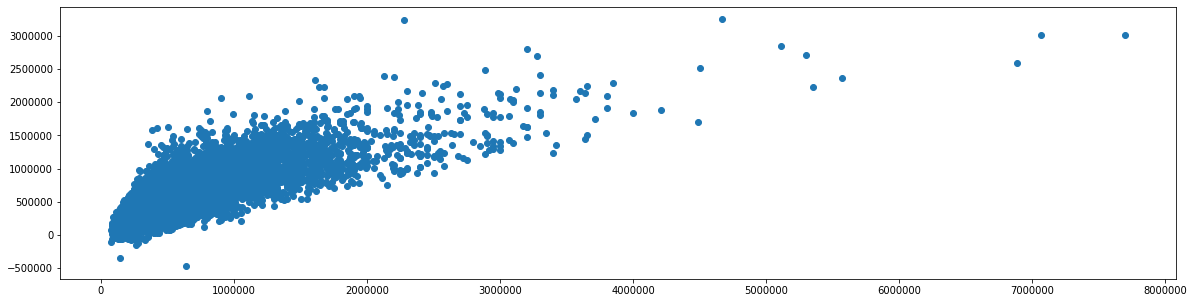

In [41]:
plt.scatter(y,predicted_y)

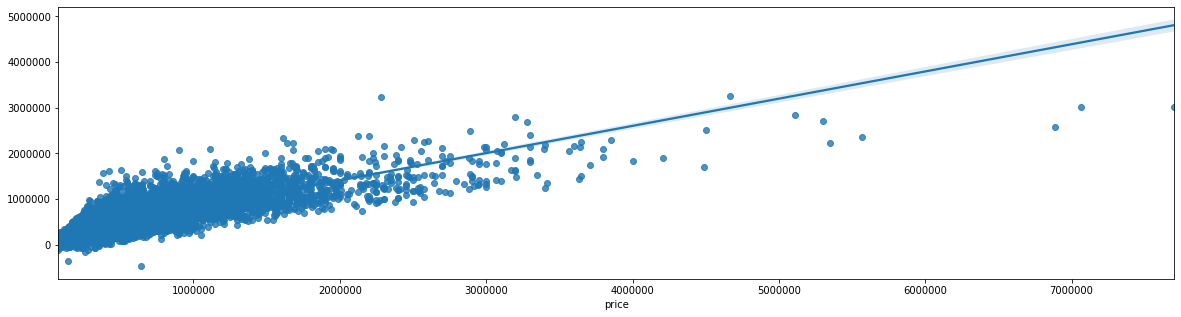

In [42]:
sns.regplot(x=y, y=predicted_y)

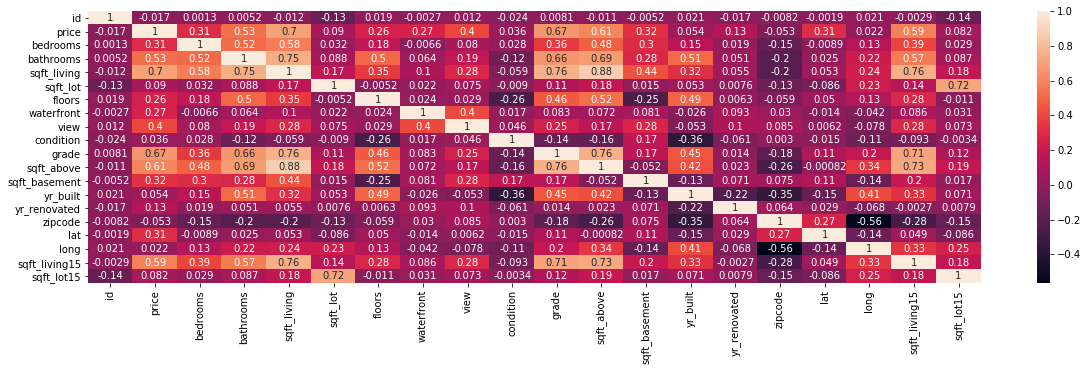

In [43]:
sns.heatmap(correlation,annot=True)

# Data Cleansing 

In [16]:
if correlation

SyntaxError: invalid syntax (<ipython-input-16-0ccef6e31093>, line 1)